In [17]:
pip install matplotlib seaborn


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import requests
from bs4 import BeautifulSoup
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [19]:
def connect_to_database():
    return mysql.connector.connect(
        host="khushiconfecciones.com",
        database="u506324710_deportivo",
        user="u506324710_Daviddeportivo",
        password="Tamedotothepa1$",
        charset='utf8mb4'  # Especifica el uso de UTF-8
    )

In [20]:
def run_query(query):
    db = connect_to_database()  # Conecta a la base de datos
    cursor = db.cursor()        # Crea un cursor para ejecutar comandos SQL
    cursor.execute(query)       # Ejecuta la consulta SQL proporcionada
    
    # Recupera todos los resultados de la consulta
    result = cursor.fetchall()
    
    # Recupera los nombres de las columnas
    columns = [desc[0] for desc in cursor.description]
    
    cursor.close()              # Cierra el cursor
    db.close()                  # Cierra la conexión a la base de datos
    
    # Convierte los resultados en un DataFrame de Pandas
    return pd.DataFrame(result, columns=columns)

In [21]:
query1 = """
SELECT * FROM VistaPartidos
"""

df1 = run_query(query1)

In [22]:
df1 


,fecha_partido,estadisticas,id_torneo,goles_equipo_visitante,goles_local,nombre_equipo_local,nombre_equipo_visitante,ganador,fecha_registroBD
0,2023-11-16,None,3,1.0,2.0,Colombia,Brasil,Holi que más,None
1,2023-09-07,None,3,0.0,1.0,Colombia,Venezuela\r\n,olas,None
2,2023-10-12,None,3,2.0,2.0,Colombia,Uruguay\r\n,None,None
3,2023-11-16,None,3,1.0,2.0,Colombia,Brasil,None,None
4,2024-09-10,None,3,NaN,NaN,Colombia,Argentina,None,None
...,...,...,...,...,...,...,...,...,...
7520,2024-04-21,None,24,2.0,1.0,Monza\r\n,Atalanta,None,2024-07-23
7521,2024-05-04,None,24,2.0,2.0,Monza\r\n,Lazio,None,2024-07-23
7522,2024-05-19,None,24,1.0,0.0,Monza\r\n,Frosinone,None,2024-07-23
7523,2024-08-19,None,25,NaN,NaN,Real Valladolid,Espanyol,None,2024-08-01


In [23]:
query2 = """
SELECT 
    equipo, 
    SUM(victorias) AS partidos_ganados, 
    SUM(empates) AS partidos_empatados, 
    SUM(derrotas) AS partidos_perdidos 
FROM 
    ( 
        SELECT 
            nombre_equipo_local AS equipo, 
            (goles_local > goles_equipo_visitante) AS victorias,
            (goles_local = goles_equipo_visitante) AS empates, 
            (goles_local < goles_equipo_visitante) AS derrotas 
        FROM 
            VistaPartidos 
        WHERE 
            id_torneo = 25 or id_torneo=4 
        
        UNION ALL 
        
        SELECT 
            nombre_equipo_visitante AS equipo, 
            (goles_equipo_visitante > goles_local) AS victorias, 
            (goles_equipo_visitante = goles_local) AS empates, 
            (goles_equipo_visitante < goles_local) AS derrotas 
        FROM 
            VistaPartidos 
        WHERE 
            id_torneo = 25 or id_torneo=4 
            
    ) AS subconsulta  
GROUP BY 
    equipo 
ORDER BY 
    partidos_ganados DESC;
"""

In [24]:
df2 = run_query(query2)
df2

,equipo,partidos_ganados,partidos_empatados,partidos_perdidos
0,Real Madrid\r\n,29,8,1
1,Barcelona\r\n,26,7,5
2,Girona\r\n,25,6,7
3,Atlético\r\n,24,4,10
4,Athletic,19,11,8
5,R. Sociedad\r\n,16,12,10
6,Betis\r\n,14,15,9
7,Villarreal\r\n,13,11,14
8,Alavés\r\n,12,10,16
9,Valencia\r\n,12,10,14


) missing from font(s) DejaVu Sans.pykernel_22312\850756753.py:22: UserWarning: Glyph 13 (
  plt.tight_layout()  # Ajusta el diseño para que no se corten las etiquetas
) missing from font(s) DejaVu Sans.lwebscrapp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


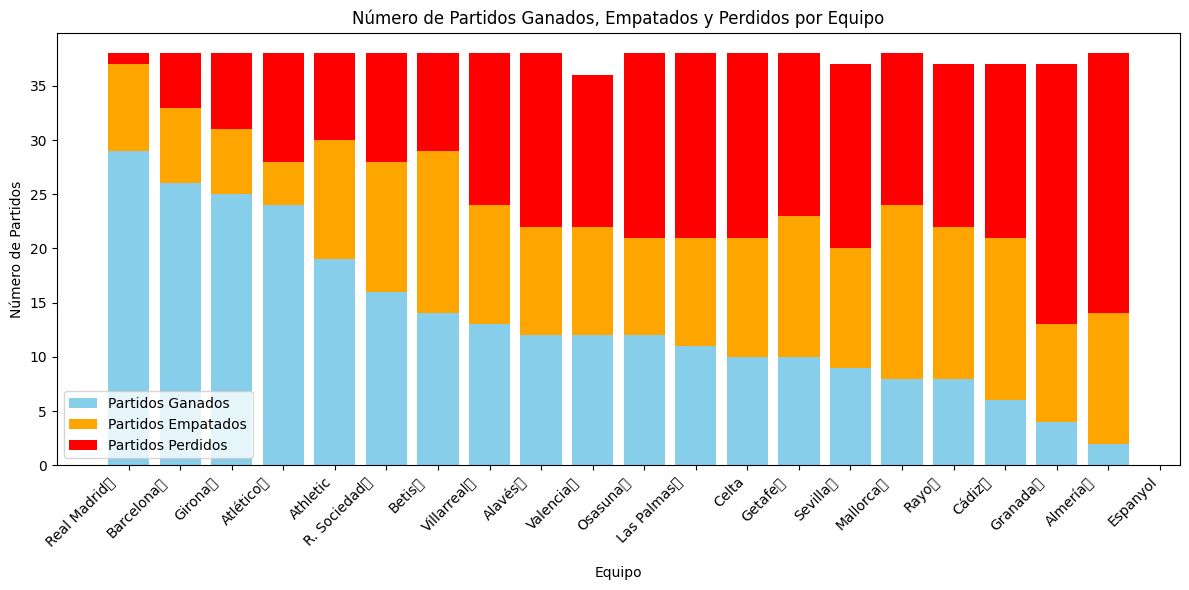

In [25]:
import matplotlib.pyplot as plt

# Supongamos que df2 es el DataFrame que has obtenido
# df2 = run_query(query2)

# Crear el diagrama de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura si es necesario

# Configura las barras
plt.bar(df2['equipo'], df2['partidos_ganados'], color='skyblue', label='Partidos Ganados')
plt.bar(df2['equipo'], df2['partidos_empatados'], color='orange', bottom=df2['partidos_ganados'], label='Partidos Empatados')
plt.bar(df2['equipo'], df2['partidos_perdidos'], color='red', bottom=df2['partidos_ganados'] + df2['partidos_empatados'], label='Partidos Perdidos')

# Configura los ejes y el título
plt.xlabel('Equipo')
plt.ylabel('Número de Partidos')
plt.title('Número de Partidos Ganados, Empatados y Perdidos por Equipo')
plt.xticks(rotation=45, ha='right')  # Rote los nombres de los equipos si es necesario
plt.legend()

# Muestra el gráfico
plt.tight_layout()  # Ajusta el diseño para que no se corten las etiquetas
plt.show()

In [26]:
queryELO = """
SELECT * FROM vista_elo;
"""

In [27]:
dfELO= run_query(queryELO)
dfELO

,id,id_partido,id_local,id_visitante,elo_local_antes,elo_local_despues,elo_visitante_antes,elo_visitante_despues,Equipo_local,Equipo_visitante
0,299,35517,2,15,None,1934.0,None,1762.0,Medellín,Once Caldas
1,322,35540,2,3,None,1926.0,None,1867.0,Medellín,América
2,341,35559,2,13,None,1919.0,None,1879.0,Medellín,Bucaramanga
3,359,35577,2,5,None,1932.0,None,1858.0,Medellín,Nacional
4,288,35506,3,9,None,1846.0,None,1795.0,América,Alianza Petrolera
...,...,...,...,...,...,...,...,...,...,...
474,408,35626,177,155,None,2239.0,None,2421.0,Monza\r\n,Atalanta
475,422,35640,177,149,None,2244.0,None,2421.0,Monza\r\n,Lazio
476,445,35663,177,165,None,2253.0,None,2057.0,Monza\r\n,Frosinone
477,469,35687,178,179,None,NaN,None,NaN,Real Valladolid,Espanyol


In [28]:
# Consulta SQL
# Consulta SQL
queryEvolucionElo = """
SELECT 
    Equipo_local AS Equipo,
    id_local AS id_equipo,
    elo_local_despues AS elo_despues,
    id_partido
FROM 
    vista_elo 
WHERE 
    id_local = 45



UNION ALL

SELECT 
    Equipo_visitante AS Equipo,
    id_visitante AS id_equipo,
    elo_visitante_despues AS elo_despues,
    id_partido
FROM 
    vista_elo 
WHERE 
    id_visitante = 45



ORDER BY 
    id_partido ASC;
"""


# Ejecutar consulta y mostrar resultados
dfEvolucionElo = run_query(queryEvolucionElo)
print(dfEvolucionElo)

           Equipo  id_equipo  elo_despues  id_partido
0  Las Palmas\r\n         45       1747.0       35221
1  Las Palmas\r\n         45       1740.0       35231
2  Las Palmas\r\n         45       1732.0       35241
3  Las Palmas\r\n         45       1722.0       35251
4  Las Palmas\r\n         45       1734.0       35267
5  Las Palmas\r\n         45       1734.0       35277
6  Las Palmas\r\n         45       1744.0       35288
7  Las Palmas\r\n         45          NaN       35682


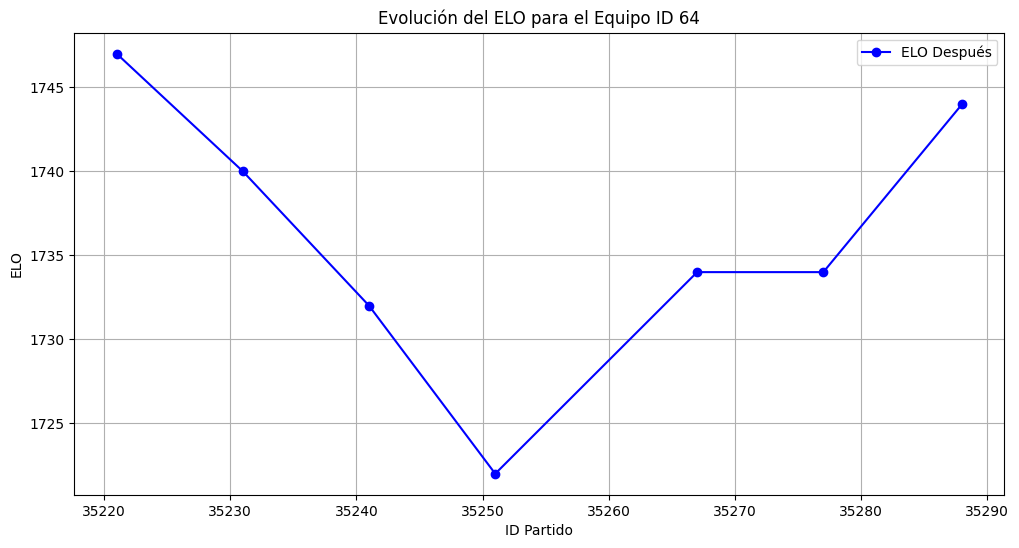

In [29]:
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar ELO después del partido
plt.plot(dfEvolucionElo['id_partido'], dfEvolucionElo['elo_despues'], marker='o', linestyle='-', color='blue', label='ELO Después')

# Configurar etiquetas y leyenda
plt.xlabel('ID Partido')
plt.ylabel('ELO')
plt.title('Evolución del ELO para el Equipo ID 64')
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()

In [30]:
# Consulta SQL
queryEvolucionElo = """
SELECT 
    v.Equipo,
    v.id_equipo,
    v.elo_despues,
    v.id_partido,
    id_torneo
FROM 
    (
        SELECT 
            Equipo_local AS Equipo,
            id_local AS id_equipo,
            elo_local_despues AS elo_despues,
            id_partido
        FROM 
            vista_elo 
       

        UNION ALL

        SELECT 
            Equipo_visitante AS Equipo,
            id_visitante AS id_equipo,
            elo_visitante_despues AS elo_despues,
            id_partido
        FROM 
            vista_elo 
       
    ) v
INNER JOIN 
    Partidos
ON 
    Partidos.id_partido = v.id_partido



where id_torneo=25 or id_torneo=4
 AND v.id_equipo IN (54, 58)
ORDER BY 
    v.id_partido ASC;
"""
# Ejecutar consulta y mostrar resultados
dfEvolucionElo = run_query(queryEvolucionElo)
print(dfEvolucionElo)

             Equipo  id_equipo  elo_despues  id_partido  id_torneo
0         Betis\r\n         58       1767.0       35223          4
1        Girona\r\n         54       1842.0       35224          4
2        Girona\r\n         54       1849.0       35231          4
3         Betis\r\n         58       1776.0       35238          4
4        Girona\r\n         54       1860.0       35243          4
5         Betis\r\n         58       1785.0       35245          4
6        Girona\r\n         54       1867.0       35250          4
7         Betis\r\n         58       1792.0       35258          4
8        Girona\r\n         54       1855.0       35262          4
9         Betis\r\n         58       1800.0       35267          4
10       Girona\r\n         54       1855.0       35271          4
11        Betis\r\n         58       1800.0       35273          4
12       Girona\r\n         54       1863.0       35280          4
13        Betis\r\n         58       1800.0       35285       

) missing from font(s) DejaVu Sans.lwebscrapp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


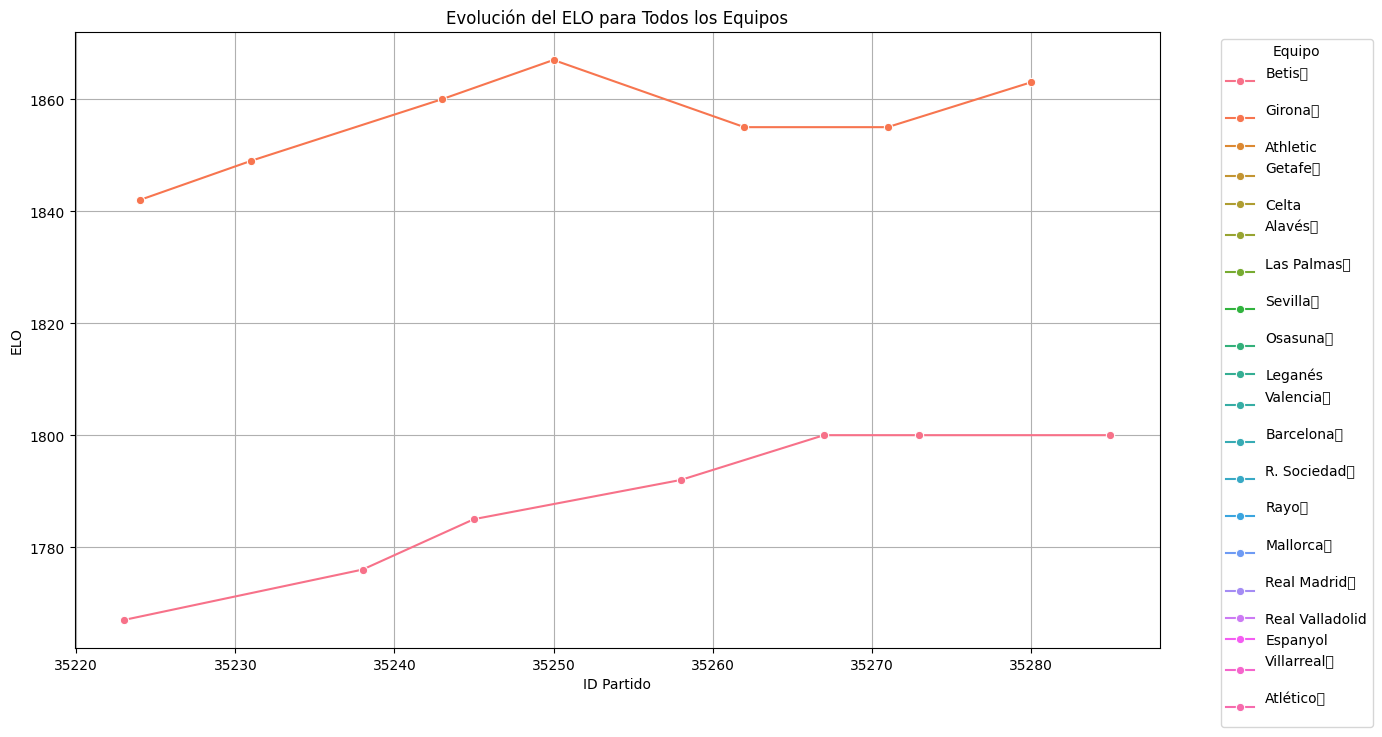

In [31]:
import seaborn as sns

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Graficar ELO después del partido para todos los equipos
sns.lineplot(data=dfEvolucionElo, x='id_partido', y='elo_despues', hue='Equipo', marker='o')

# Configurar etiquetas y leyenda
plt.xlabel('ID Partido')
plt.ylabel('ELO')
plt.title('Evolución del ELO para Todos los Equipos')
plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Mostrar gráfico
plt.show()
